In [172]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [159]:
dataset = [(' '.join(list(movie_reviews.words(fileid))), category)
           for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
random.shuffle(dataset)

In [160]:
movie_reviews.categories()

['neg', 'pos']

In [161]:
df = pd.DataFrame(dataset, columns=['text','review'])

In [162]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
preprocess = lambda x : ps.stem(x)

In [163]:
df['text'] = df['text'].apply(preprocess)
# df['review'] = df['review'].apply(review_1_0)

In [164]:
X_train, X_test , Y_train, Y_test = train_test_split(df['text'], df['review'], test_size=0.20)

In [180]:
cv = CountVectorizer()
cv_train_fit = cv.fit_transform(X_train)
# cv_test = cv.transform(X_test)
# bag_of_words = cv.transform(X_train)

In [181]:
cv_test = cv.transform(X_test)

In [182]:
nb = MultinomialNB()
nb.fit(cv_train_fit, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [183]:
y_pred_test = nb.predict(cv_test)

In [184]:
accuracy_score(Y_test, y_pred_test) * 100

80.0

In [185]:
from sklearn.metrics import confusion_matrix

In [187]:
cm_test = confusion_matrix(y_pred_test, Y_test)

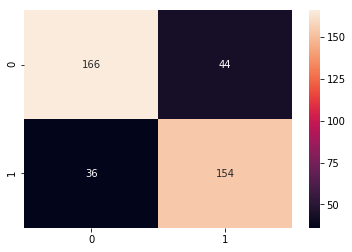

In [193]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,fmt='d')

In [121]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Create our vectorizer
vectorizer = CountVectorizer()

# All data
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'))

# Get the training vectors
vectors = vectorizer.fit_transform(newsgroups_train.data)

# Build the classifier
clf = MultinomialNB(alpha=.01)

#  Train the classifier
clf.fit(vectors, newsgroups_train.target)

# Get the test vectors
vectors_test = vectorizer.transform(newsgroups_test.data)

# Predict and score the vectors
pred = clf.predict(vectors_test)
acc_score = metrics.accuracy_score(newsgroups_test.target, pred)
f1_score = metrics.f1_score(newsgroups_test.target, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.6460435475305364
Total F1 classification score: 0.6203806145034193
